# Selección de características en modelos predictivos

Este proyecto es para IA de Moisés Calzado Cobo y Antonio Germán Márquez Trujillo

Estos archivos contienen los algoritmos implementados, pero no los importamos ya que en esta libreta los implementamos explicando su funcionamiento


In [60]:
## %run SFS.py
## %run SFFS.py

In [80]:
import pandas as pandas;
import time;
from sklearn.model_selection import cross_val_score;
from sklearn import tree;
from sklearn import preprocessing;
import numpy as np;
import matplotlib.pyplot as plt
pandas.set_option('max_colwidth', 800)

In [46]:
datos = pandas.read_csv("datos/titanic.csv")
#datos = pandas.read_csv("datos/BreastCancerDataset.csv")
datos.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,1,0,0,7,11,0,0
1,1,1,38.0,1,0,71.2833,1,1,2,1,0,3,2,12,1,1
2,3,1,26.0,0,0,7.9250,0,2,1,0,1,1,7,8,0,1
3,1,1,35.0,1,0,53.1000,0,1,2,1,0,3,2,12,1,1
4,3,0,35.0,0,0,8.0500,0,0,2,0,1,1,7,11,0,0


El primer paso para proceder con la selección de características es el que consiste en definir una función que nos permita evaluar los resultados obtenidos a la hora de predecir una característica dado un número de variables. Por lo tanto, el método nos queda de la siguiente forma:

Tenemos una función que recibe las siguientes variables:
<ul>
    <li>Datos: El conjunto de datos a tratar</li>
    <li>Variables: Conjunto de columnas con las que entrenar nuestro modelo de predicción</li>
    <li>Objetivo: Columna a predecir</li>
    <li>N_exp: Número de experimentos a llevar a cabo</li>
    <li>Cv: COMPLETAR</li>
</ul>

Y nos devuelve la puntuación promedio obtenida a la hora de llevar a cabo los sucesivos experimentos sobre el conjunto de variables dado.

In [47]:
def evaluar_soluciones(datos, variables, objetivo, n_exp, cv):
    data_frame = pandas.DataFrame(data=datos)
    X = data_frame[variables]
    y = data_frame[objetivo]
    clf = tree.DecisionTreeClassifier()
    
    scores = cross_val_score(clf, X, y, cv=cv, scoring="balanced_accuracy")
    
    for i in range(n_exp-1):
        new_scores = cross_val_score(clf, X, y, cv=cv, scoring="balanced_accuracy") 
        scores = scores + new_scores
    
    scores = scores/n_exp
    return np.mean(scores)

Con la función mostrar_datos(variables) que implementamos a continuación, lo que queremos hacer es mostrar para cada conjunto de variables evaluado sus correspondientes resultados. De esta forma, lo que recibe es un array que contiene un array de variables en cada posición y el objetivo que no es mas que la variable que queremos priorizar:

In [48]:
def mostrar_datos(datos):
    datos_tabla = [['Mejor Solución', 'Tamaño', 'Rendimiento']]
    claves = datos.keys()
    
    for clave in claves:
        length = len(clave.split(", "))
        datos_tabla = datos_tabla +[[clave, length, datos[clave]]]

    return pandas.DataFrame(datos_tabla)

Implementamos la función SFS

In [82]:
def SFS(datos, respuesta, d = 0):
    start = time.time()
    
    diccionario_resultado = {}
    soluciones_actual = []
    columnas = list(datos.columns)
    
    #Compruebo que la variable a predecir no esté en mi conjunto de variables a evaluar
    if respuesta in columnas:
        columnas.remove(respuesta)
        
    k = 0
    d = d if d else len(columnas)

    while(k<d):
        resultado = []
        score_resultado = 0

        for i in range(len(columnas)):
            
            #Compruebo que la nueva variable a evaluar no haya sido ya evaluada
            if columnas[i] not in soluciones_actual:
                solucionTemporal = list(soluciones_actual)
                solucionTemporal.append(columnas[i])
                new_resultado = evaluar_soluciones(datos, solucionTemporal, respuesta, 15, 10)
                
                #Si el resultado es favorable, actualizo el resultado final
                if new_resultado > score_resultado:
                    resultado = solucionTemporal
                    score_resultado = new_resultado
        
        soluciones_actual.append(resultado[len(resultado)-1])
        clave = ', '.join(soluciones_actual)
        diccionario_resultado[clave] = score_resultado
        k = k+1
        
    done = time.time()
    elapsed = done - start
    print(elapsed)
        
    return diccionario_resultado

Probamos el algoritmo SFS implementado:

In [83]:
resultado_SFS = SFS(datos, "Survived", 3)

11.717660427093506


Ahora que tenemos los resultados del algoritmo, los mostramos por pantalla:

In [77]:
mostrar_datos(resultado_SFS)

,0,1,2
0,Mejor Solución,Tamaño,Rendimiento
1,Initial,1,0.783354
2,"Initial, SibSp",2,0.805218
3,"Initial, SibSp, Deck",3,0.80772


Implementamos la funcion SFFS

In [65]:
def SFFS(datos, respuesta):
    diccionario_resultado = {}
    soluciones_actual = []
    añadidos = []
    eliminados = []
    columnas = list(datos.columns)
    k = 0
    
    #Compruebo que la variable a predecir no esté en mi conjunto de variables a evaluar
    if respuesta in columnas:
        columnas.remove(respuesta)
    
    while(k<10):
        resultado = []
        score_resultado = 0
        score_resultado_eliminado = 0
        resultado_eliminado = []
        eliminado = ''

        for i in range(len(columnas)):
            
            #Compruebo que la nueva variable a evaluar no haya sido ya evaluada o este en añadidos
            if columnas[i] not in soluciones_actual and columnas[i] not in añadidos:
                solucionTemporal = list(soluciones_actual)
                solucionTemporal.append(columnas[i])
                new_resultado = evaluar_soluciones(datos, solucionTemporal, respuesta, 15, 10)
                
                #Si el resultado es favorable, actualizo el resultado final
                if new_resultado > score_resultado:
                    resultado = solucionTemporal
                    score_resultado = new_resultado
                    
        if len(resultado)>0:
            soluciones_actual.append(resultado[len(resultado)-1])
            añadidos.append(resultado[len(resultado)-1])
        
        score_resultado_eliminado = score_resultado
        
        if len(soluciones_actual)>1:
            for i in range(len(soluciones_actual)):

                #Compruebo que la variable a evaluar no este en eliminados
                if soluciones_actual[i] not in eliminados:
                    solucionTemporal = list(soluciones_actual)
                    solucionTemporal.remove(soluciones_actual[i])
                    new_resultado = evaluar_soluciones(datos, solucionTemporal, respuesta, 15, 10)

                    #Si el resultado es favorable, actualizo el resultado para eliminar la variable actual que
                    #ha sido quitada de la solución actual
                    if new_resultado > score_resultado_eliminado:
                        resultado_eliminado = solucionTemporal
                        score_resultado_eliminado = new_resultado
                        eliminado = soluciones_actual[i]
                    
            if score_resultado<score_resultado_eliminado:     
                soluciones_actual = resultado_eliminado
                eliminados.append(eliminado)
                k=0
        
        k = k+1
        
        if len(añadidos)<len(columnas):
            clave = ', '.join(soluciones_actual)
            diccionario_resultado[clave] = score_resultado_eliminado
                    
    return diccionario_resultado

Probamos el algoritmo SFFS implementado:

In [66]:
resultado_SFFS = SFFS(datos, "Survived")

Ahora que tenemos los resultados del algoritmo, los mostramos por pantalla:

In [67]:
mostrar_datos(resultado_SFFS)

,0,1,2
0,Mejor Solución,Tamaño,Rendimiento
1,Initial,1,0.783354
2,"Initial, SibSp",2,0.805218
3,"Initial, SibSp, Deck",3,0.80772
4,"Initial, SibSp, Deck, Fare_cat",4,0.809517
5,"Initial, SibSp, Deck, Fare_cat, Title",5,0.815809


In [68]:
def pintar_resultados(resultados): 
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data
    people = resultados.keys()
    y_pos = np.arange(len(people))
    performance = resultado_SFFS.values()

    ax.barh(y_pos, performance, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis()
    ax.set_xlabel('Rendimiento')
    ax.set_title('Selección de características')
    plt.show()

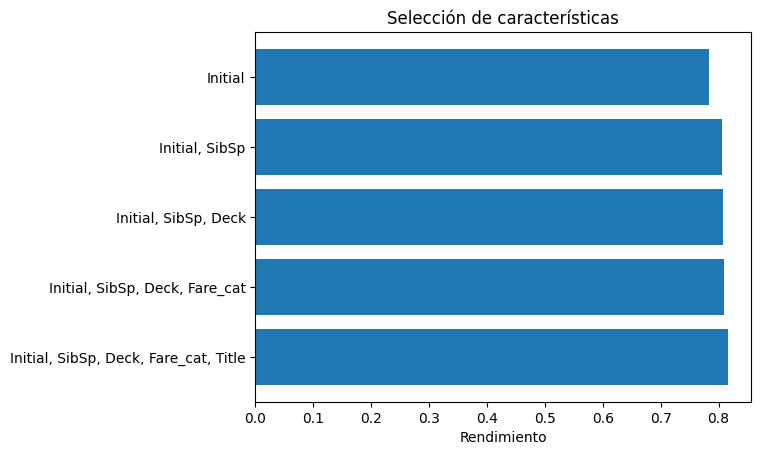

In [69]:
pintar_resultados(resultado_SFFS)